# Exploratory Data Analysis of Indian Companies Registered Since 1857

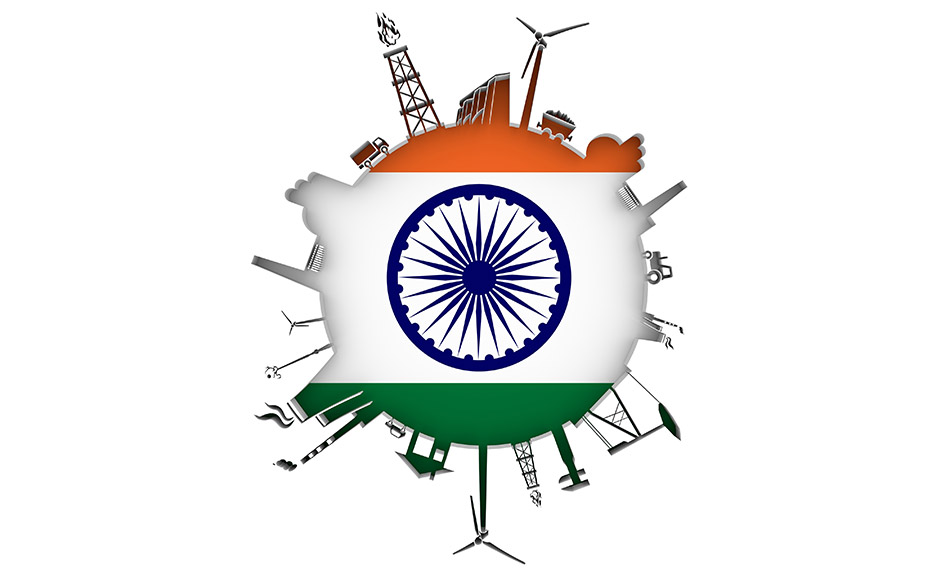
### What is exploratory data analysis?
Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop an understanding of data, by uncovering trends, relationships and patterns.

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

Exploratory data analytics often uses visual techniques, such as graphs, plots, and other visualizations. This is because our natural pattern-detecting abilities make it much easier to spot trends and anomalies when they’re represented visually.

We might ask ourself what is the need of EDA? After all, we have algorithms that can automate so many tasks. Surely it’s easier (and even preferable) to skip this step of the process altogether?

In truth, it has been shown time and again that effective EDA provides invaluable insights that an algorithm cannot. You can think of this a bit like running a document through a spellchecker versus reading it yourself. While software is useful for spotting typos and grammatical errors, only a critical human eye can detect the nuance. An EDA is similar in this respect—tools can help you, but it requires our own intuition to make sense of it. This personal, in-depth insight will support detailed data analysis further down the line.

## Dataset
Let's get to know about our dataset like it's source, content and usefullness.

### Source
We will download our dataset from [Kaggle](https://www.kaggle.com/). Kaggle, a subsidiary of Google LLC, is an online community of data scientists and machine learning practitioners. Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges.

### About
Our dataset contains the details of all Indian companies ever registered in India from 1857 to 2020 which can be downladed from [here](https://www.kaggle.com/datasets/rowhitswami/all-indian-companies-registration-data-1900-2019). It contains data on master details of any company registered with Registrar of Companies (RoC). Data contains various information like Corporate Identification Number(CIN), Company Name, Company Status, Company Class, Company Category, Authorized Capital in INR, Paid-up Capital in INR, Date of Registration, Registered State, Registrar of Companies, Principal Business Activity, Registered Office Address and Sub Category.

### Columns

1. CORPORATE_ IDENTIFICATION_NUMBER - Corporate Identification Number sometimes referred to as CIN is a unique identification number which is assigned by the ROC (Registrar of Companies) of various states under the MCA (Ministry of Corporate Affairs).

2. COMPANY_NAME - Name of the company.

3. COMPANY_STATUS - The 'Status' tell the current state of the company. Whether it is active and operating or dormant or it has been struck off and closed. There are 13 such status that a company could be carrying.
    * ACTV - Active
    * NAEF - Not available for e-filing
    * ULQD - Under liquidation
    * AMAL - Amalgamated
    * STOF - Strike off
    * DISD - Dissolved
    * CLLD - Converted to LLP and Dissolved
    * UPSO - Under process of Striking Off
    * CLLP - Converted to LLP
    * LIQD - Liquidated
    * DRMT - Dormant
    * MLIQ - Vanished
    * D455 - Dormant under section 455

4. COMPANY_CLASS - Companies are primarily classified into private and public. Private companies or private limited companies are those companies that are closely-held and have less than 200 shareholders. Public companies are limited companies that have more than 200 shareholders and are listed on a stock exchange.
    * Public
    * Private
    * Private (One Person Company)

5. COMPANY_CATEGORY - The category of the company.
    * Company limited by Shares
    * Company Limited by Guarantee
    * Unlimited Company

6. COMPANY_SUB _CATEGORY - The sub-category of the company.
    * Non-govt company
    * State Govt company
    * Subsidiary of Foreign Company
    * Guarantee and Association comp
    * Union Govt company

7. DATEOF REGISTRATION - Date of registration of the company.

8. REGISTERED_STATE - State in which company was registered.

9. AUTHORIZED_CAP - Authorized Capital of the company (INR)

10. PAIDUP_CAPITAL - Paid Up Capital of the company (INR).

11. INDUSTRIAL_CLASS - Industrial class of the company as per NIC 2004.

12. PRINCIPAL_ BUSINESS_ACTIVITY _AS_ PER_CIN - Principal Business Activity of the company as per CIN.

13. REGISTERED_OFFICE _ADDRESS - Registered office address of the company.

14. REGISTRAR_OF _COMPANIES - Registrar office of the company.

15. EMAIL_ADDR - Email address of the companies owner/director.

16. LATEST_YEAR _ANNUAL _RETURN - Annual return of the last year.

17. LATEST_YEAR _FINANCIAL _STATEMENT - Financial Statement of the last year.

### Uses
We will get to know about the growth and development of various industries in India during various phases of our history since 1857. We can analyse the data to know about the growth of industries in various categories and regions of India and get to know where India is moving in terms of development of industries. The data can be useful to identify our weak and strong sectors and help us in formulation of policies and regulations to overcome those weaknesses.

## Download the Data

Let's download the data using `opendatasets` library which is useful in downloading data from Kaggle datasets and Google Drive URLs, and install some of the libraries which are useful for data analysis and visualization.

In [1]:
# installing pandas and numpy for analysis
!pip install pandas numpy  --quiet

In [2]:
# installing libraries for visualization of data 
!pip install matplotlib seaborn plotly --quiet

In [3]:
# importing various modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# importing matplotlib and configuring visualization parameters
import matplotlib
matplotlib.rcParams['font.size']=10
matplotlib.rcParams['figure.figsize']=(12,8)
matplotlib.rcParams['figure.facecolor']='#00000000'

We'll use the opendatasets helper library to download files from [here](https://www.kaggle.com/datasets/rowhitswami/all-indian-companies-registration-data-1900-2019).

In [5]:
!pip install opendatasets --quiet --upgrade

In [6]:
import opendatasets as od

In [7]:
indian_comp_reg_url = 'https://www.kaggle.com/datasets/rowhitswami/all-indian-companies-registration-data-1900-2019/download?datasetVersionNumber=2'

In [8]:
od.download(indian_comp_reg_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ahlenoorkhan
Your Kaggle Key: ··········


100%|██████████| 112M/112M [00:01<00:00, 71.9MB/s] 


Let's check the size and content of the file. 

In [9]:
!ls -lh all-indian-companies-registration-data-1900-2019

total 566M
-rw-r--r-- 1 root root 566M Feb 16 11:29 registered_companies.csv


In [10]:
registered_companies_csv = 'all-indian-companies-registration-data-1900-2019/registered_companies.csv'

## Data Preparation and Cleaning

Let's load the CSV files using the Pandas library. We'll use the name `raw_df` for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.



In [11]:
%%time
raw_df = pd.read_csv(registered_companies_csv)

/usr/local/lib/python3.8/dist-packages/IPython/core/magics/execution.py:1310: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


CPU times: user 7.63 s, sys: 858 ms, total: 8.48 s
Wall time: 8.63 s


In [12]:
raw_df

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
0,F01450,NIKO RESOURCES LIMITED,ACTV,NaN,NaN,NaN,NaN,Gujarat,0.0,0.0,NaN,Agriculture & allied,"4TH FLOOR,LANDMARKRACE COURSE",ROC DELHI,SANJAY@NIKOINDIA.COM,NaN,NaN
1,F01518,WORLDWIDE RESOURCES HOLDINGS LTD,ACTV,NaN,NaN,NaN,16-07-1998,Gujarat,0.0,0.0,NaN,Agriculture & allied,403 3 6 322 MAHAVIR HOUSEBUSHEER BAGH HYDERGUD...,ROC DELHI,NaN,NaN,NaN
2,F01573,ATWOOD OCEANIC PACIFIC LIMITED,ACTV,NaN,NaN,NaN,NaN,Gujarat,0.0,0.0,NaN,Agriculture & allied,"Quadrant 1, Plot Number 18, 2nd FloorSuman Tow...",ROC DELHI,info@nangia.com,NaN,NaN
3,F01802,SOLVAY S A BELGIUM,NAEF,NaN,NaN,NaN,25-06-2001,Gujarat,0.0,0.0,NaN,Agriculture & allied,"Plot No. 3526 & 3527,GIDC Industrial Estate,",ROC DELHI,amit.kumashi@solvay.com,NaN,NaN
4,F01818,TATE AND LYLE INDUSTRIES LTD,ACTV,NaN,NaN,NaN,25-07-2001,Gujarat,0.0,0.0,NaN,Agriculture & allied,24 ATMAJYOTI NAGARELLORA PARK,ROC DELHI,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992165,U51109NL2000PTC006232,SCIENTIFIC ADVANCE INSTRUMENTS & EQUIPMENTS CO...,STOF,Private,Company limited by Shares,Non-govt company,30-06-2000,Nagaland,1000000.0,20000.0,51109.0,Wholesale and retail trade repair of motor veh...,"BEHIND TOWN COMMITTEE,MKALABARI ROAD",ROC SHILLONG,NaN,NaN,NaN
1992166,U51109NL2000PTC006233,SUNSHINE INSTRUMENTS & EQUIPMENTS COMPANY PRIV...,STOF,Private,Company limited by Shares,Non-govt company,30-06-2000,Nagaland,1000000.0,200000.0,51109.0,Wholesale and retail trade repair of motor veh...,JAIN TEMPLE ROADDIMAPUR,ROC SHILLONG,NaN,NaN,NaN
1992167,U51109NL2000PTC006259,STERN (INDIA) PLANTATION & MARKETING PRIVATE L...,STOF,Private,Company limited by Shares,Non-govt company,25-07-2000,Nagaland,200000.0,3000.0,51109.0,Wholesale and retail trade repair of motor veh...,RENGMA CHURCH BUILDINGKHERMAHALDIMAPUR,ROC SHILLONG,NaN,NaN,NaN
1992168,U74950NL1998PTC005463,T.A. NGULLIE FRUIT PRODUCTS PVT LTD.,STOF,Private,Company limited by Shares,Non-govt company,09-07-1998,Nagaland,2500000.0,0.0,74950.0,Real estate renting and business activities,"CHUMUKEDIME,BLOCK-3, DIST.KOHIMA.",ROC SHILLONG,rks97cs@yahoo.com,NaN,NaN


The datafset comprises of nearly 2 million rows with 17 columns of data.

Let's view the list of columns in the dataframe.

In [13]:
raw_df.columns

Index(['CORPORATE_IDENTIFICATION_NUMBER', 'COMPANY_NAME', 'COMPANY_STATUS',
       'COMPANY_CLASS', 'COMPANY_CATEGORY', 'COMPANY_SUB_CATEGORY',
       'DATE_OF_REGISTRATION', 'REGISTERED_STATE', 'AUTHORIZED_CAP',
       'PAIDUP_CAPITAL', 'INDUSTRIAL_CLASS',
       'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', 'REGISTERED_OFFICE_ADDRESS',
       'REGISTRAR_OF_COMPANIES', 'EMAIL_ADDR', 'LATEST_YEAR_ANNUAL_RETURN',
       'LATEST_YEAR_FINANCIAL_STATEMENT'],
      dtype='object')

The column name are self explanatory are to understand. 

Let's check the datatypes of the columns.

In [14]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992170 entries, 0 to 1992169
Data columns (total 17 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   CORPORATE_IDENTIFICATION_NUMBER         object 
 1   COMPANY_NAME                            object 
 2   COMPANY_STATUS                          object 
 3   COMPANY_CLASS                           object 
 4   COMPANY_CATEGORY                        object 
 5   COMPANY_SUB_CATEGORY                    object 
 6   DATE_OF_REGISTRATION                    object 
 7   REGISTERED_STATE                        object 
 8   AUTHORIZED_CAP                          float64
 9   PAIDUP_CAPITAL                          float64
 10  INDUSTRIAL_CLASS                        object 
 11  PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  object 
 12  REGISTERED_OFFICE_ADDRESS               object 
 13  REGISTRAR_OF_COMPANIES                  object 
 14  EMAIL_ADDR                        

We can see that most of the columns have `object` datatypes while only `Authorized Capital` and `Paidup Capital` are float datatypes either because they contain values of different types or contain empty values (NaN). Since most of the columns have object datatypes, let's check the number of unique values each columns have.

In [15]:
raw_df.nunique()

CORPORATE_IDENTIFICATION_NUMBER           1992170
COMPANY_NAME                              1986230
COMPANY_STATUS                                 13
COMPANY_CLASS                                   3
COMPANY_CATEGORY                                3
COMPANY_SUB_CATEGORY                            5
DATE_OF_REGISTRATION                        27721
REGISTERED_STATE                               36
AUTHORIZED_CAP                               9080
PAIDUP_CAPITAL                             144245
INDUSTRIAL_CLASS                             9263
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN         17
REGISTERED_OFFICE_ADDRESS                 1787716
REGISTRAR_OF_COMPANIES                         26
EMAIL_ADDR                                1048199
LATEST_YEAR_ANNUAL_RETURN                     554
LATEST_YEAR_FINANCIAL_STATEMENT               443
dtype: int64

We have a large set of unique values for most of the columns. Let's check if there are missing data in the columns.

In [16]:
missing_percentage = raw_df.isna().sum().sort_values(ascending=False) * 100/len(raw_df)
missing_percentage

LATEST_YEAR_ANNUAL_RETURN                 41.729220
LATEST_YEAR_FINANCIAL_STATEMENT           41.604331
EMAIL_ADDR                                18.583153
REGISTRAR_OF_COMPANIES                     2.118193
REGISTERED_OFFICE_ADDRESS                  0.765949
COMPANY_SUB_CATEGORY                       0.255500
COMPANY_CATEGORY                           0.255249
COMPANY_CLASS                              0.254898
INDUSTRIAL_CLASS                           0.241495
DATE_OF_REGISTRATION                       0.126746
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN     0.000602
CORPORATE_IDENTIFICATION_NUMBER            0.000000
PAIDUP_CAPITAL                             0.000000
COMPANY_NAME                               0.000000
REGISTERED_STATE                           0.000000
COMPANY_STATUS                             0.000000
AUTHORIZED_CAP                             0.000000
dtype: float64

Out of 17 columns, we have 6 columns with no `Nan` values. The proportion of `Nan` values varies from nearly 0% to 41% in which only 3 columns have considerable amount of missing data. 

Let's have a plot of missing values data.


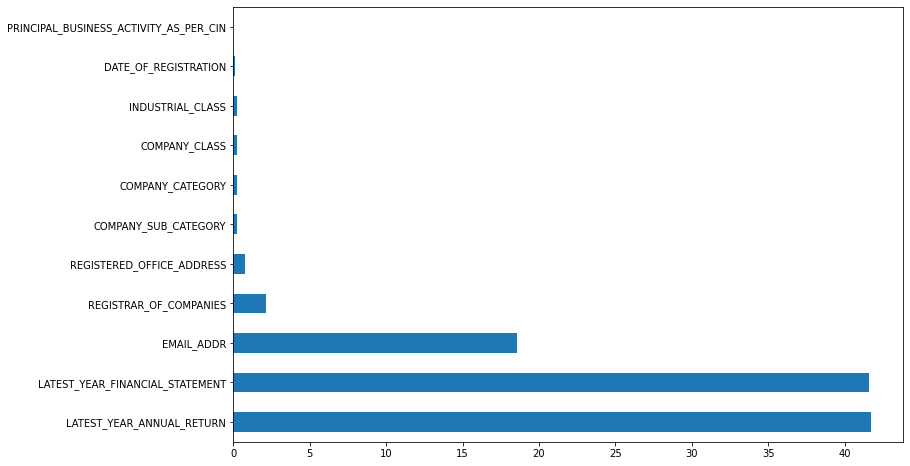

In [17]:
missing_percentage[missing_percentage != 0].plot(kind='barh');

Since we have large amount missing data from some of the columns, we will restrict our analysis to some of the columns to understand status, class and categories of companies across different states over the period of time.

Let's select a subset of columns with the relevant data for our analysis.

In [18]:
selected_columns = ['COMPANY_STATUS', 'COMPANY_CLASS', 'COMPANY_CATEGORY', 'COMPANY_SUB_CATEGORY', 'DATE_OF_REGISTRATION', 'REGISTERED_STATE',
                    'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']

In [19]:
len(selected_columns)

7

Let's extract a copy of the data from these columns into a new data frame `df`. We can continue to modify further without affecting the original data frame.

In [20]:
df = raw_df[selected_columns].copy()

Let's drop the rows which have empty values in the `Date of Registration` column since our analysis is based on companies registered over the time.

In [21]:
df = df.dropna(subset=['DATE_OF_REGISTRATION'])

Let's fill all the empty cells with 'Not Available' value to make our analysis easier.

In [22]:
df = df.fillna('Not Available')

Since `Date of Registration` column is showing `object` datatype, let's convert it to `datetime` datatype which will be very useful for our analysis.

In [23]:
df['DATE_OF_REGISTRATION'] = pd.to_datetime(df['DATE_OF_REGISTRATION'], dayfirst=True, errors='coerce')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989645 entries, 1 to 1992169
Data columns (total 7 columns):
 #   Column                                  Dtype         
---  ------                                  -----         
 0   COMPANY_STATUS                          object        
 1   COMPANY_CLASS                           object        
 2   COMPANY_CATEGORY                        object        
 3   COMPANY_SUB_CATEGORY                    object        
 4   DATE_OF_REGISTRATION                    datetime64[ns]
 5   REGISTERED_STATE                        object        
 6   PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 121.4+ MB


In [25]:
df

,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN
1,ACTV,Not Available,Not Available,Not Available,1998-07-16,Gujarat,Agriculture & allied
3,NAEF,Not Available,Not Available,Not Available,2001-06-25,Gujarat,Agriculture & allied
4,ACTV,Not Available,Not Available,Not Available,2001-07-25,Gujarat,Agriculture & allied
5,ACTV,Not Available,Not Available,Not Available,2001-10-08,Gujarat,Agriculture & allied
6,ACTV,Not Available,Not Available,Not Available,2001-12-31,Gujarat,Agriculture & allied
...,...,...,...,...,...,...,...
1992165,STOF,Private,Company limited by Shares,Non-govt company,2000-06-30,Nagaland,Wholesale and retail trade repair of motor veh...
1992166,STOF,Private,Company limited by Shares,Non-govt company,2000-06-30,Nagaland,Wholesale and retail trade repair of motor veh...
1992167,STOF,Private,Company limited by Shares,Non-govt company,2000-07-25,Nagaland,Wholesale and retail trade repair of motor veh...
1992168,STOF,Private,Company limited by Shares,Non-govt company,1998-07-09,Nagaland,Real estate renting and business activities


## Exploratory Analysis and Visualization

Before we ask questions about the companies registered, it would be helpful to understand the values presented in the columns and relationship between them. 

### Date of Registration

Since we have data of registered companies spanning over 160+ years, let's begin our analysis with the number of companies registered over the years.

In [26]:
df.DATE_OF_REGISTRATION.dt.year.value_counts().sort_index()

1857.0         1
1863.0         3
1871.0         3
1872.0         3
1873.0         3
           ...  
2016.0     93876
2017.0    107635
2018.0    117924
2019.0    128658
2020.0     12747
Name: DATE_OF_REGISTRATION, Length: 151, dtype: int64

Let's visualize the data for better understanding.

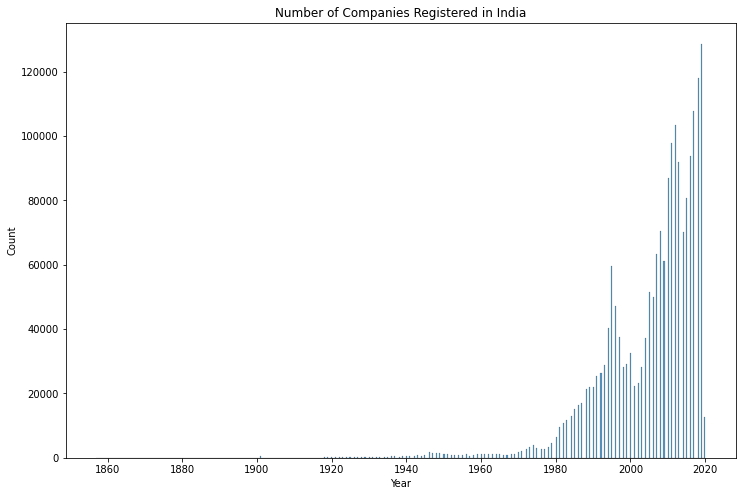

In [27]:
sns.histplot(df.DATE_OF_REGISTRATION.dt.year)
plt.title("Number of Companies Registered in India")
plt.xlabel('Year');

We can observe that growth in number of companies was nearly stagnant in pre-independent India maybe due to the fact that India was basically an agricultural economy state. Even after independence, growth of companies was stagnant and gradually started to rise since 1970's. We can see a steep rise in number of companies after the 1991 maybe due to 1991 economic reforms policy which ended the `licence raj` system and allowed foreign investments in the country.

For the year 2020, the count of companies registered is low because we have data upto the 31st January 2020 only.

### Company Status

Let's see how many status a company can have and the count of companies in each status.

In [28]:
df.COMPANY_STATUS.nunique()

13

In [29]:
company_status = df.COMPANY_STATUS.value_counts()
company_status

ACTV    1189527
STOF     687419
UPSO      41456
AMAL      24887
CLLP      13175
DISD       9766
NAEF       8815
ULQD       6458
CLLD       4874
D455       2145
LIQD       1120
DRMT          2
MLIQ          1
Name: COMPANY_STATUS, dtype: int64

We can visualize this information using bar chart.

In [30]:
sns.set_style('darkgrid')

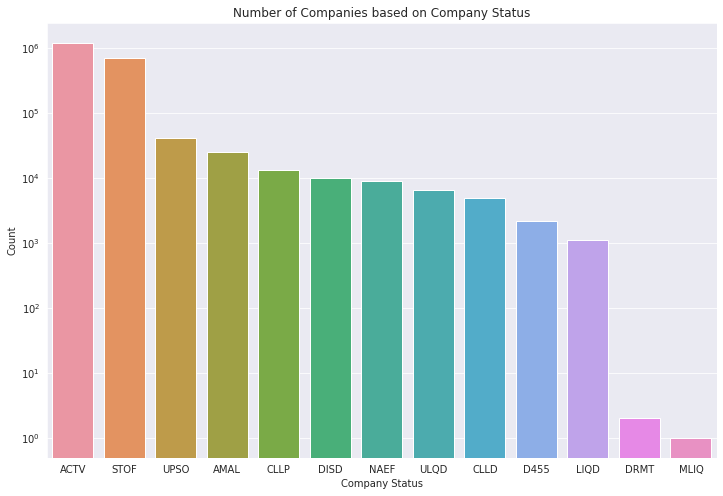

In [31]:
c = sns.barplot(x=company_status.index, y=company_status.values)
c.set_yscale('log')
plt.title("Number of Companies based on Company Status")
plt.xlabel('Company Status')
plt.ylabel('Count');

We have companies with 13 different status.

It seems that nearly 60% of the companies are active and 34% are already striked off(STOF) or closed while 2% are under process of strike off(UPSO). The remaining companies are under various conditions with only 2 Dormant (DRMT)companies and only 1 company which is vanished(MLIQ).

### Company Class

Let's go through the different classes of companies.

In [32]:
company_class = df['COMPANY_CLASS'].value_counts(normalize=True)
company_class

Private                        0.913600
Public                         0.069088
Private(One Person Company)    0.015187
Not Available                  0.002126
Name: COMPANY_CLASS, dtype: float64

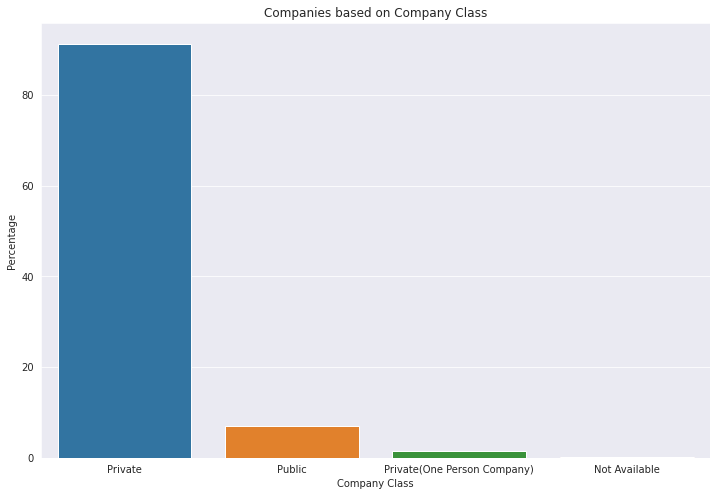

In [33]:
sns.barplot(x=company_class.index, y=company_class.values*100)
plt.title("Companies based on Company Class")
plt.xlabel('Company Class')
plt.ylabel('Percentage');

We have nearly 7% of Public companies and the rest are Private companies. It confirms that India have large number of Micro, Small and Medium Entrprises (MSME). Let's visualize the class of companies with Active status.

In [34]:
company_class_active = df.COMPANY_CLASS[df.COMPANY_STATUS=='ACTV'].value_counts()
company_class_active

Private                        1093599
Public                           65787
Private(One Person Company)      27289
Not Available                     2852
Name: COMPANY_CLASS, dtype: int64

In [35]:
fig=px.pie(company_class_active, values=company_class_active.values, names=company_class_active.index, 
           labels={"values" : "Count",
                   "index" : "Class"}, 
           title="Company Class of Active Companies")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

It shows that more than 94% Private and One Person companies are still active as compare to 5.5% Public companies. It may be due to the fact that most of the Private companies came into existence after 1991 economic reforms which gave to boost to small and medium scale comp
anies.

Let's view the growth of `Private and One Person` companies since 1857.

In [36]:
pvt_comp = df.DATE_OF_REGISTRATION.dt.year.where(df.COMPANY_CLASS.isin(['Private', 'Private(One Person Company)'])).value_counts().sort_index()

In [37]:
pvt_comp_df = pd.DataFrame({'Year': pvt_comp.index, 'Count': pvt_comp.values})

In [38]:
pvt_comp_df

,Year,Count
0,1863.0,1
1,1871.0,1
2,1881.0,1
3,1883.0,1
4,1884.0,1
...,...,...
129,2016.0,91836
130,2017.0,105171
131,2018.0,115332
132,2019.0,125172


Let's visualize it usig line graph.

In [39]:
px.line(pvt_comp_df, y='Count', x='Year', title='Growth of Private Companies')

We can clearly see that the growth of private companies was stagnant until late 1970's and after the 1991's economic reforms, there is exponenetial growth of private companies.

### Company Category

Let's check the number of companies within various categories.

In [40]:
category = df['COMPANY_CATEGORY'].value_counts()
category

Company limited by Shares       1963881
Company Limited by Guarantee      20563
Not Available                      4234
Unlimited Company                   967
Name: COMPANY_CATEGORY, dtype: int64

We can visualize this data to understand it better.

In [41]:
fig=px.pie(category, values=category.values, names=category.index,
           labels={"values" : "Count",
                   "index" : "Category"}, 
           title="Number of companies based on Company Category")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Companies are categorised into 3 sections in which 98.7% companies are companies limited by shares while nearly 1% companies are limited by guarantee. Only 967 companies are `Unlimited Company` which is 0.0486% of all the registered companies which confirms that risks of `Unlimited Company` outweigh it benefits.

Let's visualize the category of companies in each class based on the company status.

In [107]:
new_df = df.copy()
new_df['COMPANY'] = "All Companies"
new_df.head(3)

,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,COMPANY
1,ACTV,Not Available,Not Available,Not Available,1998-07-16,Gujarat,Agriculture & allied,All Companies
3,NAEF,Not Available,Not Available,Not Available,2001-06-25,Gujarat,Agriculture & allied,All Companies
4,ACTV,Not Available,Not Available,Not Available,2001-07-25,Gujarat,Agriculture & allied,All Companies


In [111]:
fig = px.treemap(new_df, 
                 path=['COMPANY', 'COMPANY_STATUS', 'COMPANY_CLASS', 'COMPANY_CATEGORY'],
                 color_continuous_scale='RdBu', 
                 title='Category of Companies in each class based on Company Status'
                 )
fig.show()

We can observe a clear pattern that under all status of companies, `Private category` companies occupy the major portion with the exception of `Dissolved` status companies where `Public sector` companies are the leading ones. Also, `Companies limited by shares` are in majority under `Private category` companies.

### Company Sub-Category

Let's view the number of companies differentiated based on sub-categories.

In [42]:
sub_category = df['COMPANY_SUB_CATEGORY'].value_counts()
sub_category

Non-govt company                  1968166
Subsidiary of Foreign Company       12369
Not Available                        4238
Guarantee and Association comp       2384
State Govt company                   1912
Union Govt company                    576
Name: COMPANY_SUB_CATEGORY, dtype: int64

Let' visualize this data for better understanding.

In [43]:
fig=px.pie(sub_category, values=sub_category.values, names=sub_category.index,
           labels={"values" : "Count",
                   "index" : "Sub-Category"}, 
           title="Number of companies based on Company Sub-Category")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show();

We have 5 sub-categories of companies with 98.9% companies are `Non-goverment companies` while nearly 0.12% are Union and State Goverment companies. Out of total government companies, 76.8% companies are `State Govt Company`.

### Registered State

Let's analyze the distribution of companies across the states and union territories of India.

In [44]:
df['REGISTERED_STATE'].nunique()

36

In [45]:
state = df['REGISTERED_STATE'].value_counts()

In [46]:
fig=px.pie(state, values=state.values, names=state.index,
           labels={"values" : "Count",
                   "index" : "Area"}, 
           title="Companies across different States and Union Territories")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Maharashtra, Delhi and West Bengal have more than 47% of registered companies with Maharshtra being on top by having nearly 20% of companies. 

### Principal Business activity as per CIN

Let's see what are the principal activities of companies registered.

In [47]:
df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].nunique()

18

In [48]:
business_activity = df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts()
business_activity.head(5)

Real estate renting and business activities                                                         679949
Manufacturing                                                                                       410389
Wholesale and retail trade repair of motor vehicles motorcycles and personal and household goods    227330
Construction                                                                                        162125
Financial intermediation                                                                            120710
Name: PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN, dtype: int64

In [49]:
fig = px.bar(business_activity, x=business_activity.values, y=business_activity.index, 
             labels={"index": "Business Activity",
                     "x": "Count"},
             title='Principal Business activity as per CIN')
fig.show()

The companies are didvided into 18 activities. Nearly 34% of companies are associated with `Real estate renting and business activities` which makes it the largest shareholder among them while 20.6% of companies are associated with `Manufacturing`.

## Ask and Answer Questions

We've observed the growth in number of companies based on various parameters over the time by exploring the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.


### Q: What is the status of companies registered before independence? 

For this we have to use`COMPANY_STATUS` column with `DATE_OF_REGISTRATION` column to filter companies registered before 1947.

In [50]:
comp_before_indp = df.COMPANY_STATUS.loc[df.DATE_OF_REGISTRATION.dt.year < 1947].value_counts()
comp_before_indp

DISD    4008
STOF    3621
ACTV    3357
NAEF    1058
ULQD     443
LIQD     272
AMAL     203
UPSO     141
CLLP      23
CLLD       9
D455       6
Name: COMPANY_STATUS, dtype: int64

Let's visualize the data to understand it better.

In [51]:
fig=px.pie(values=comp_before_indp.values, names=comp_before_indp.index,
           labels={"values" : "Count",
                   "names" : "Company Status"}, 
           title='Status of Companies Registered Before 1947')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

We can see that only 25.5% of companies are active while more than 58% companies are striked-off or dissolved.

### Q: Which business activity will be affected most when UPSO status companies will be striked-off?

Let's filter the `COMPANY_STATUS` column to get the `UPSO` status companies and then we can find affected business activities with the `PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN` column.

In [52]:
upso_comp_df = df[df.COMPANY_STATUS == 'UPSO']

In [53]:
upso_cat = upso_comp_df.PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN.value_counts(normalize=True).head(5)
upso_cat

Real estate renting and business activities                                                         0.352446
Manufacturing                                                                                       0.175439
Wholesale and retail trade repair of motor vehicles motorcycles and personal and household goods    0.135758
Construction                                                                                        0.084475
Financial intermediation                                                                            0.067445
Name: PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN, dtype: float64

In [54]:
fig = px.bar(y=upso_cat.values*100, x=upso_cat.index,
             labels={"x": "Business Activity",
                     "y": "Count"},
             title='Affected business activities due to UPSO status companies',
             width=1000, height=600)

fig.update_xaxes(tickangle=10)

fig.show()

More than 80% of `UPSO (Under Process of Strike-Off)` status companies are from these 5 business activities. Real estate related companies will be most affected as more than 35% of `UPSO` status companies are from this sector which is not unexpected as 34% of total registered companies are from this sector.

### Q: Which states are favourable for Private(One Person companies)?

We will use the `COMPANY_CLASS` and `REGISTERED_STATE` columns to find the most favourable state for private one person companies.

In [55]:
one_person_df = df[df.COMPANY_CLASS == 'Private(One Person Company)'] 

In [56]:
fav_state = one_person_df.REGISTERED_STATE.value_counts(normalize=True)
fav_state.head(5)

Maharashtra      0.173815
Delhi            0.128872
Karnataka        0.105606
Uttar Pradesh    0.100377
Tamil Nadu       0.070393
Name: REGISTERED_STATE, dtype: float64

As expected, Maharashtra (due to Mumbai being the economic capital of India) and Delhi are more favourable for Private One Person companies. It is good to see that Uttar Pradesh having 10% of total Private One person companies while it have only 5.85% of total registered companies.

### Q: What are top 5 principal business activities of Unlimited companies?

We'll analyze the `Company Category` and `Principal Business Activities` columns to know about the preferred sectors of the Unlimited companies.

In [57]:
unlimited_comp_df = df[df.COMPANY_CATEGORY == 'Unlimited Company'] 

In [58]:
bus_unlimited_comp = unlimited_comp_df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts().sort_values(ascending=False)
bus_unlimited_comp.head(5)

Financial intermediation                                                                            214
Real estate renting and business activities                                                         204
Manufacturing                                                                                       197
Extraterritorial organizations and bodies                                                            91
Wholesale and retail trade repair of motor vehicles motorcycles and personal and household goods     78
Name: PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN, dtype: int64

Let's visualize this data.

In [59]:
fig=px.pie(values=bus_unlimited_comp.values, names=bus_unlimited_comp.index,
           labels={"values" : "Count",
                   "names" : "Business Activity"}, 
           title='Top 5 Principal Business Activities of Unlimited Companies',
           width= 700, height= 700)

fig.update_layout(showlegend=False)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

We have only 967 `Unlimited Companies` out of which the top 5 business activities have more than 80% of companies. `Financial Intermediation` business sector is the most preferred business activity followed by `Real estate` and `Manufacturing` businesses.

### Q: Which are the preferred business activities of government companies after the 1991 economic reforms?

Let's filter the datatset to get the number of companies registered after 1991 and see the growth in number of companies registered using `Company Sub-Category` and `Principal Business Activity`columns.

In [60]:
after_reform_df = df.loc[(df.DATE_OF_REGISTRATION.dt.year > 1991)]

In [61]:
govt_comp = after_reform_df.loc[(after_reform_df.COMPANY_SUB_CATEGORY == 'State Govt company') | (after_reform_df.COMPANY_SUB_CATEGORY == 'Union Govt company')].PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN.value_counts()

In [62]:
govt_comp.head(5)

Real estate renting and business activities    299
Electricity gas and water supply               271
Transport storage and communications           139
Manufacturing                                  131
Construction                                   128
Name: PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN, dtype: int64

In [63]:
govt_comp.values.sum()

1435

Let's visualize the principal business activities of new government companies registered after 1991 economic reforms.

In [64]:
fig=px.pie(values=govt_comp.values, names=govt_comp.index,
           labels={"values" : "Count",
                   "names" : "Business Activity"}, 
           title='Principal Business activities of Government Companies registered after 1991',
           width= 700, height= 700)
fig.update_layout(showlegend=False)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

1435 new government companies are registered since 1992 in every business activity. More than 20% companies are in `Real estate` sector followed by `Electricity, gas and water supply` and `Transport, storage and communication`. These 3 businesses have nearly 50% of all companies.

### Q: What are principal business activities of 10 states with lowest number of active companies?

Let's use the `Company Status` column to filter the dataset for active companies and use the `Registered State` columns to find the lowest number of companies in the states and then we'll use `Principal Business Activity as per CIN` column.

In [65]:
active_comp_df = df.loc[df.COMPANY_STATUS == 'ACTV']

In [66]:
low_active_states = active_comp_df.REGISTERED_STATE.value_counts().sort_values().head(10)
low_active_states

Sikkim                           2
Lakshadweep                     11
Mizoram                        101
Nagaland                       245
Daman and Diu                  251
Arunachal Pradesh              257
Andaman and Nicobar Islands    354
Dadra and Nagra Haveli         395
Tripura                        458
Meghalaya                      556
Name: REGISTERED_STATE, dtype: int64

In [67]:
low_active_states.values.sum()

2630

In [68]:
business_states_low_comp = active_comp_df[active_comp_df.REGISTERED_STATE.isin(low_active_states.index)].PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN.value_counts()

In [69]:
business_states_low_comp

Manufacturing                                                                                       720
Real estate renting and business activities                                                         556
Wholesale and retail trade repair of motor vehicles motorcycles and personal and household goods    241
Construction                                                                                        236
Agriculture & allied                                                                                212
Transport storage and communications                                                                119
Hotels and restaurants                                                                              112
Financial intermediation                                                                            105
Electricity gas and water supply                                                                     90
Other community social and personal service activities          

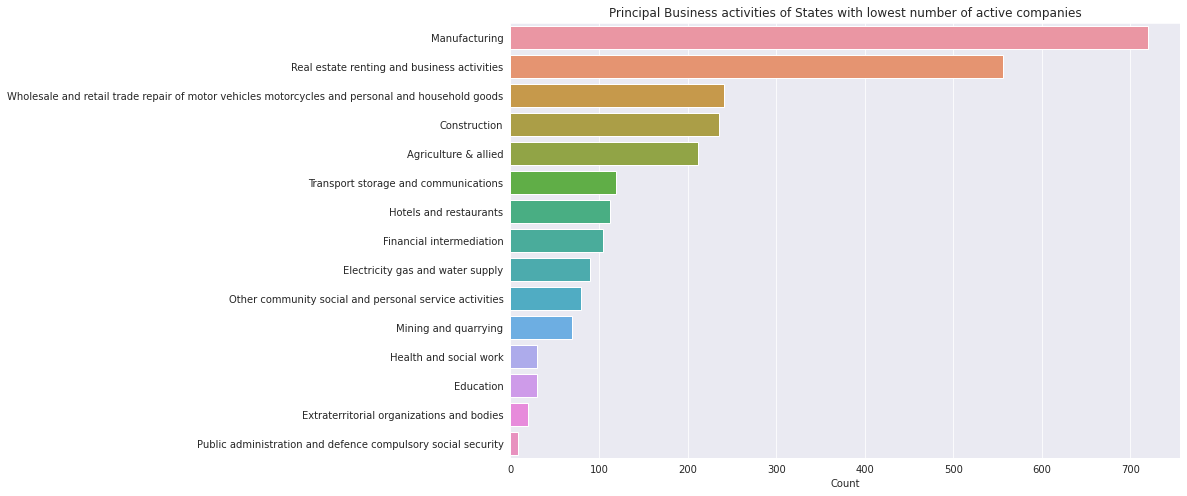

In [70]:
sns.barplot(x=business_states_low_comp.values, y=business_states_low_comp.index)
plt.title("Principal Business activities of States with lowest number of active companies")
plt.xlabel("Count");

Only 2630 registered companies are active in 10 states and union territories. As expected, most of the companies are in manuacturing and real estate businesses. 

### Q: Which are top 5 states having maximum numbers of Foreign Subsidiary Company?

We'll use the `Company Sub-category` and `Registered State` columns to find the states with the maximum number of `Foreign Subsidiary Companies`.

In [71]:
subs_comp = df[df.COMPANY_SUB_CATEGORY == 'Subsidiary of Foreign Company'].REGISTERED_STATE.value_counts().head(5)

In [72]:
subs_comp

Maharashtra    3460
Delhi          2387
Karnataka      2321
Tamil Nadu     1083
Haryana         981
Name: REGISTERED_STATE, dtype: int64

In [73]:
fig=px.pie(values=subs_comp.values, names=subs_comp.index,
           labels={"values" : "Count",
                   "names" : "State"}, 
           title='Distribution of Foreign Subsidiary',
           width= 600, height= 600)
fig.update_layout(showlegend=False)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

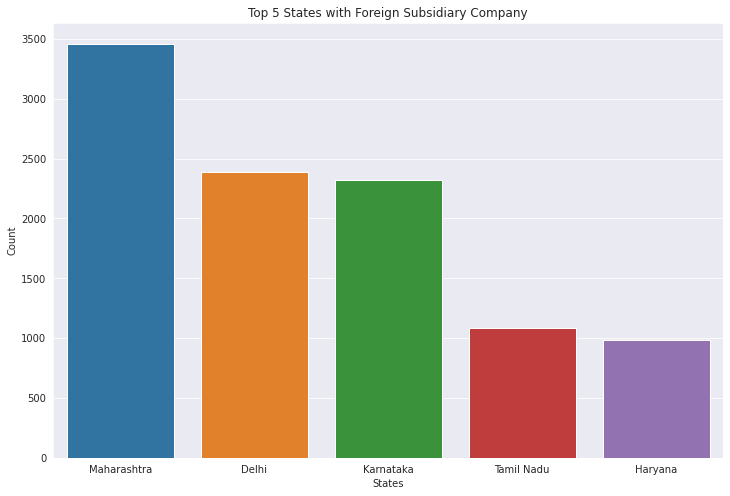

In [74]:
sns.barplot(x=subs_comp.index, y=subs_comp.values)
plt.xlabel('States')
plt.ylabel('Count')
plt.title('Top 5 States with Foreign Subsidiary Company');

More than 1/3 of all Foreign Subsidiary companies are registered in Maharshtra which is not unexpected. Although Haryana having more than 9% of companies is pretty unexpected as it has only 2.55% of total registered companies.

### Q: Which company sub-category and states have maximum number of non-active companies?

Let's filter the dataset using `Company Status` column and count values from `Company Sub-Category` and `Registered States` columns.

In [75]:
non_active_df = df.loc[df.COMPANY_STATUS != 'ACTV']

In [76]:
non_active_sub_cat = non_active_df.COMPANY_SUB_CATEGORY.value_counts(normalize=True)

In [77]:
non_active_sub_cat

Non-govt company                  0.994438
Subsidiary of Foreign Company     0.002618
Not Available                     0.001726
Guarantee and Association comp    0.000700
State Govt company                0.000410
Union Govt company                0.000107
Name: COMPANY_SUB_CATEGORY, dtype: float64

Most of the non-active companies are Non-Government companies which is not surprising considering their share among the registered companies.

In [78]:
non_active_state = non_active_df.REGISTERED_STATE.value_counts().head(10)
non_active_state

Maharashtra      162347
Delhi            142913
West Bengal       80783
Tamil Nadu        72164
Telangana         47521
Karnataka         47386
Gujarat           41265
Uttar Pradesh     37875
Rajasthan         23887
Kerala            22512
Name: REGISTERED_STATE, dtype: int64

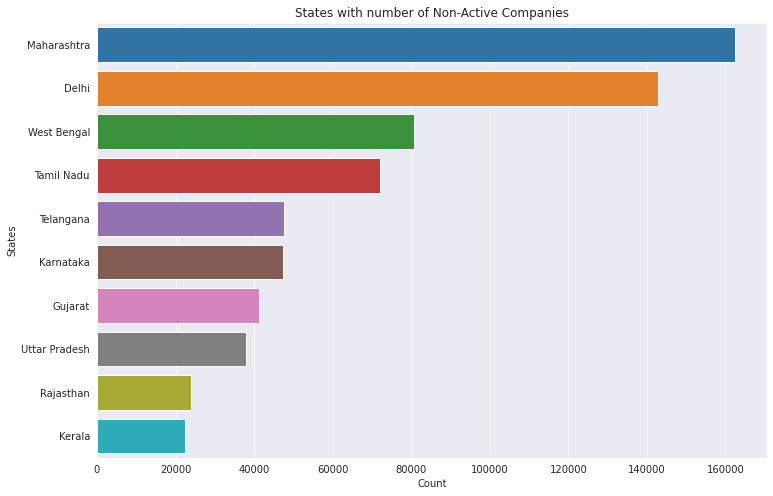

In [79]:
sns.barplot(x=non_active_state.values, y=non_active_state.index)
plt.ylabel('States')
plt.xlabel('Count')
plt.title('States with number of Non-Active Companies');

Maharashtra having the highest number of total companies, also, have the highest number of non-active companies. The share of non-active companies in Telangana is more compared to total number of companies in Telangana.

## Inferences and Conclusion

* We have observed that only 1/4th of companies registered before independence are active today while very few of them are either amalgamated or coverted to `LLP`.

* We have seen that major `Principal Business activites` of companies are related to `Real estate and manufacturing`. As we have some 41456 companies which are under process of strike off, most of these companies have businesses in `Real estate, manufacturing, motor vehicle, construction and finiancial intermediation` sector.

* 1.5% of total registered companies are Private-One Person company. As Maharashtra have maximum number of total companies followed by Delhi, we have seen that these states are also most favourable for `Private(One Person Company)`.

* `Financial Intermediation` business activity is the most preferred business of `Unlimited Companies` followed by `Real estate and Manufacturing`.

* 1435 new Government (State and Union) companies are registered since 1992 with businesses related to all principal business activities. Goverment companies are mostly involved in `Real estate` related activities.

* We have observed that `real estate` business is the most preferred business activity of Non-goverment and Government companies.

* North-east States and some Union territories are the 10 states with least number of active companies. Among these companies, most of them are in `manufacturing and real estate` related business activities. Their are very few companies related to `Health and education` activity in these states. Respective state and Union government should focus on these sector for the development of local population.

* Haryana have nealry 9% of total `Foreign Subsidiary Companies` while it has only 2.5% of total companies. Maharashtra and Delhi, as usual, are the most prefereed states for Foreign subsidiary companies.

* Most of the non-active companies are from non-government sectors and most of them are located in Maharashtra. We can say that job security in government companies better as compared to non-governemnt companies and perhaps that's the reason why people prefer jobs in these companies.

## References and Future Work

Check out the following resources to learn more about the dataset and tools used in this notebook:

- Indian Companies Registration Data: https://www.kaggle.com/datasets/rowhitswami/all-indian-companies-registration-data-1900-2019
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- Plotly Express user guide: https://plotly.com/python/plotly-express/
- `opendatasets` Python library: https://github.com/JovianML/opendatasets

For future work, one can use other columns to find information about the company capital and annual return and status of the financial statement submitted by the companies.
